In [145]:
# Data management
import pandas as pd
import pickle

# Data preprocessing and trasformation (ETL)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml, load_iris, make_moons, make_classification


# Math and Stat modules
import numpy as np
from scipy.stats import sem, randint
from random import choice

# Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Hyperparameter Optimization
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.utils.fixes import loguniform

# Unsupervised Learning

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.tree import export_graphviz
%matplotlib inline

In [120]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_decision(ax, clf, X, y, **params):
    x0, x1 = X[:, 0], X[:, 1]
    print(x1)
    xx, yy = make_meshgrid(x0, x1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True, alpha = 0.8):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=alpha)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [2]:
X, y, columns_name = [pickle.load(open('credit_card.pkl','rb'))[k] for k in ['features','labels','columns']]

In [3]:
iris_data = load_iris()
X_iris = iris_data['data'][:,2:]
y_iris = (iris_data["target"] == 0).astype(np.int)

# Support Vector Machines
Support Vector Machine - SVM - sono un modello molto performante e versatile nell'ambito del ML. Utilizzate per la classificazione lineare e non lineare, la regressione e persino per l'identificazione di outlier (outlier detection).

In Scikit-learn SVMs sono implementate dalle classi **SVC** e **LinearSVC** contenute nel modulo **svm**.

In [64]:
setosa_or_versicolor = (y_iris == 0) | (y_iris == 1)
X_iris_2 = X_iris[setosa_or_versicolor]
y_iris_2 = y_iris[setosa_or_versicolor]

# SVM Classifier model
svm_clf = LinearSVC(C=200, max_iter=50000)
svm_clf.fit(X_iris_2, y_iris_2)

LinearSVC(C=200, max_iter=50000)

(0.0, 5.5, 0.0, 2.0)

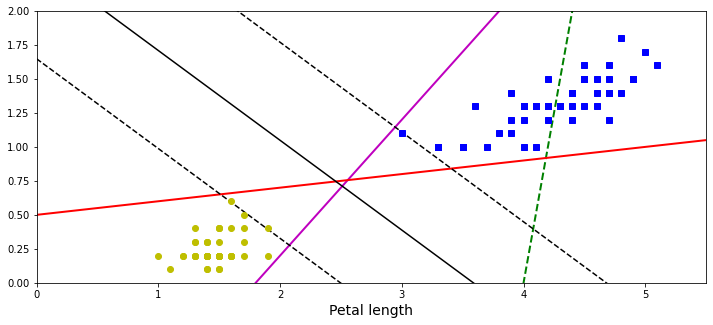

In [67]:
xx = np.linspace(0, 5.5, 200)
pred_1 = 5*xx - 20
pred_2 = xx - 1.8
pred_3 = 0.1 * xx + 0.5

def plot_svc_decision_boundary(ax, svm_clf, xx):
    w = svm_clf.coef_[0]
    a = -w[0] / w[1]
    yy = a * xx - (svm_clf.intercept_[0]) / w[1]
    
    margin = 1 / np.sqrt(np.sum(svm_clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot()
ax.plot(xx, pred_1, "g--", linewidth = 2, label='Separazione 1')
ax.plot(xx, pred_2, "m-", linewidth = 2, label='Separazione 2')
ax.plot(xx, pred_3, "r-", linewidth = 2, label='Separazione 3')
plot_svc_decision_boundary(ax, svm_clf, xx)
ax.plot(X_iris_2[:, 0][y_iris_2==1], X_iris_2[:, 1][y_iris_2==1], "bs")
ax.plot(X_iris_2[:, 0][y_iris_2==0], X_iris_2[:, 1][y_iris_2==0], "yo")
ax.set_xlabel("Petal length", fontsize=14)
ax.axis([0, 5.5, 0, 2])

Le due classi sono linearmente separabili e esiste un ricco insieme di iperpiano separatori, tra cui quelli rossi e viola in figura. Tuttavia le ultime sono molto vicine alle classi del training set, ponendo limitazioni sulle performance sul validationa e test set. In neretto sono stati riportati 
l'iperpiano identificato da SVM e i margini identificati.

Nel caso del dataset Iris, la separazione e' ben evidente, cosi' come la la classificazione mediante hard margin e support vector. Nel caso di un sottoinsieme di feature del nostro dataset di esempio, si ottengono risultati molto meno significativi.

In [68]:
X_subset = X[:,[20,27]]
# SVM Classifier model
svm_clf = LinearSVC(C=1, max_iter=50000)
svm_clf.fit(X_subset, y)

LinearSVC(C=1, max_iter=50000)

[-1.32693191 -1.32693191 -1.32693191 ...  0.65203194  0.65203194
 -0.33744998]


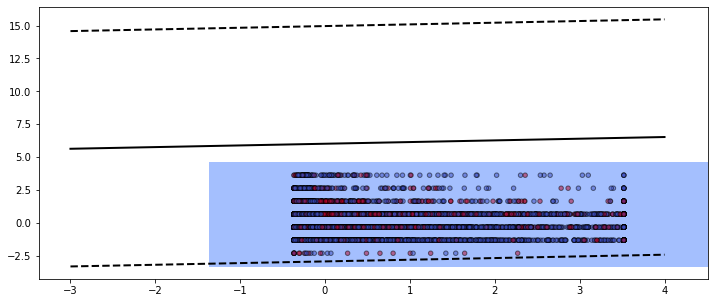

In [69]:
ax = plt.figure(figsize=(12,5)).add_subplot()
plot_decision(ax, svm_clf, X_subset, y ,cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
x0 = np.linspace(-3, 4, 200)
iperpiano_sep = -w[0]/w[1] * x0 - b/w[1]
margine = 1/w[1]
margine_up = iperpiano_sep + margine
margine_down = iperpiano_sep - margine
ax.plot(x0, iperpiano_sep, "k-", lw=2)
plt.plot(x0, margine_up, "k--", lw=2)
plt.plot(x0, margine_down, "k--", lw=2)

Il metodo di hard margin classification funziona solamente se le classi sono linearmente separabili ed e' sensibile agli outlier.<br>
Nell'esempio vediamo l'effetto di instanze outlier.

(-2.0, 2.0, -2.0, 2.0)

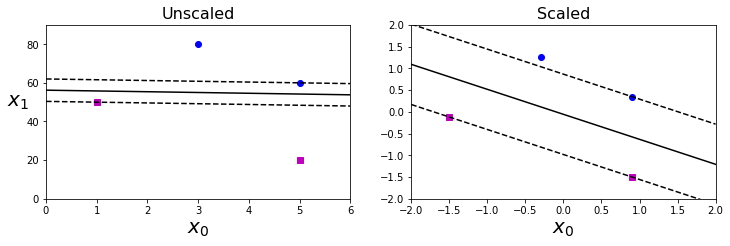

In [61]:
#Dataset esempio con outlier
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
#Training
svm_clf = SVC(kernel='linear',C=100)
svm_clf.fit(Xs, ys)

fig = plt.figure(figsize=(12,3.2))
ax1 = fig.add_subplot(121)
ax1.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
ax1.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(ax1, svm_clf, np.linspace(0,6,100))
ax1.set_xlabel("$x_0$", fontsize=20)
ax1.set_ylabel("$x_1$  ", fontsize=20, rotation=0)
ax1.set_title("Unscaled", fontsize=16)
ax1.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)
ax2 = fig.add_subplot(122)
ax2.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
ax2.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(ax2, svm_clf, np.linspace(-2,2,100))
ax2.set_xlabel("$x_0$", fontsize=20)
ax2.set_title("Scaled", fontsize=16)
ax2.axis([-2, 2, -2, 2])

Per questo vengono introdotte nel modello le variabilie di slack che misurano il livello di violazione del margine. Si deve quindi ottimizzare il margine e allo stesso stempo ridurre il numero di violazioni - interessi contropposti.

Attraverso il parametro $C$ posso controllare il trade-off ampiezza del margine e numero di violazioni. Se diminuisco il valore di C privilegio il margine e aumento il numero di violazioni, evitando piu' probabilmente overfitting. Se aumento C ho la situazione opposta e posso incappare piu' facilmente in overfitting.

Nel caso delle carte di credito, l'effetto del parametro C non e' molto apprezzabile, se non ininfluente.

0 0.01
Training per 0.01 finito
1 1
Training per 1 finito
2 50
Training per 50 finito


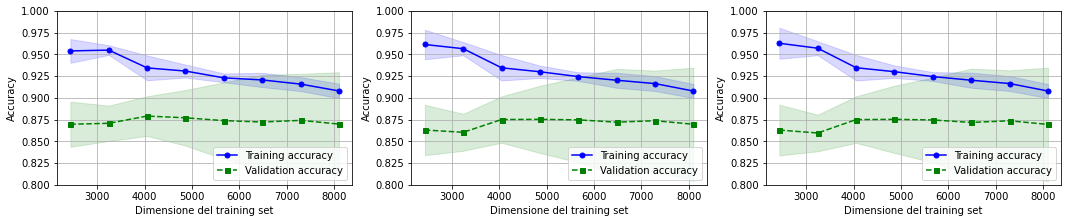

In [70]:
Cs = [0.01, 1, 50]
fig = plt.figure(figsize=(18,3.2))
for i, c in enumerate(Cs):
    print(i,c)
    clf = LinearSVC(C=c, max_iter=50000)
    train_sizes, train_scores, test_scores = learning_curve(clf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('Training per {} finito'.format(c))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    ax = fig.add_subplot(130+(i+1))
    ax.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

### Nonlinear SVM

Molti dataset non sono linearmente separabili. Un approccio per gestire la non linearita' e' la creazione di feature polinomiali. Il problema e' che introducendo feature polinomiali con alto grado del polinomio si introduce un elevato numero di feature aggiuntive che rendono il processo di training computazionalmente oneroso. Nel caso delle SVM non esiste la necessita' di creare delle feature nuove dal momento che si puo' utilizzare il kernel trick (vedi formulazione duale del problema di ottimizzazione quadratica). Attraverso il kernel trick non ho un'esplosione di feature e posso introdurre non linearita'.

Vediamo come applicare SVM non lineari.

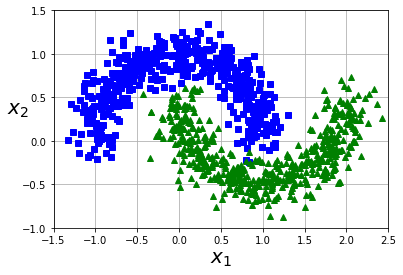

In [4]:
X_moon, y_moon = make_moons(n_samples=1000, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X_moon[:, 0][y_moon==0], X_moon[:, 1][y_moon==0], "bs")
    plt.plot(X_moon[:, 0][y_moon==1], X_moon[:, 1][y_moon==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.show()

In [82]:
poly3_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly3_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Posso aumentare il grado del polinomio ma potrei aumentare la probabilita' di overfitting

In [83]:
poly6_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=5, C=5))
    ])
poly6_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=5, degree=6, kernel='poly'))])

Text(0.5, 1.0, '$d=6, r=5, C=5$')

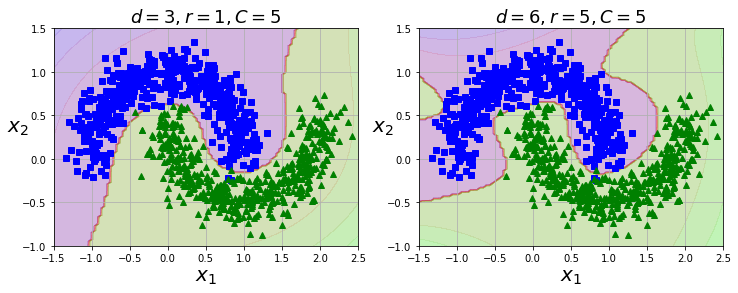

In [84]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(poly3_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly6_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=6, r=5, C=5$", fontsize=18)

Il coefficiente _coef0_ amplifica gli effetti delle feature con alto degree. Anche in qeusto caso ha influenza su overfitting

In [85]:
poly6_1_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=1, C=5))
    ])
poly6_1_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=6, kernel='poly'))])

In [86]:
poly6_10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=6, coef0=10, C=5))
    ])
poly6_10_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=10, degree=6, kernel='poly'))])

Text(0.5, 1.0, '$d=6, r=10, C=5$')

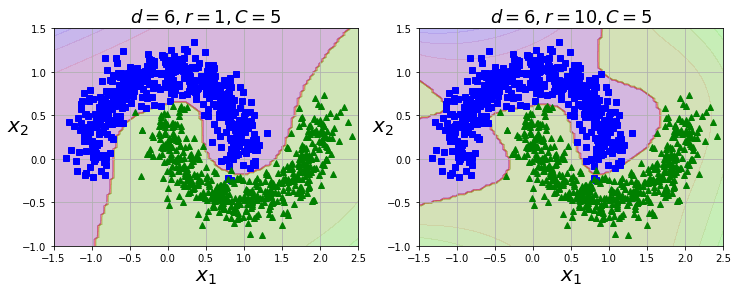

In [87]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plot_predictions(poly6_1_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=6, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly6_10_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=6, r=10, C=5$", fontsize=18)

Una seconda opzione per gestire la non linearita' e' aggiungere feature calcolate utilizzando una funzione di similarita'che misura quanto un'istanza $\mathbf{x}$ e' simile ad un landmark $\mathbf{l}$. Per esempio, una funzione utilizzata e' Gaussian Radial Basis Function - RBF.
$$\phi(\mathbf{x},\mathbf{l}) = exp(-\gamma||\mathbf{x}-\mathbf{l}||^2)$$
Ottengo una forma a campana che assume valori tra 0 (punti distanti e dissimili) e 1 (punti uguali) con $\gamma$ che agisce sulla dispersione della campana. Diminuendo $\gamma$ aumento la dispersione e punti piu' lontani sono considerati piu' simili al landmark, rispetto ad un $\gamma$ piu' piccolo.

Nel nostro caso i landmark corrispondono a tutte le istanze del dataset - *m* - e se applicassi RBF senza kernel trick otterrei *m* features e di conseguenza una matrice *m* x *m*. 

Anche in questo caso vale il kernel trick e in SKL posso utilizzare la solita classe **SVC**.

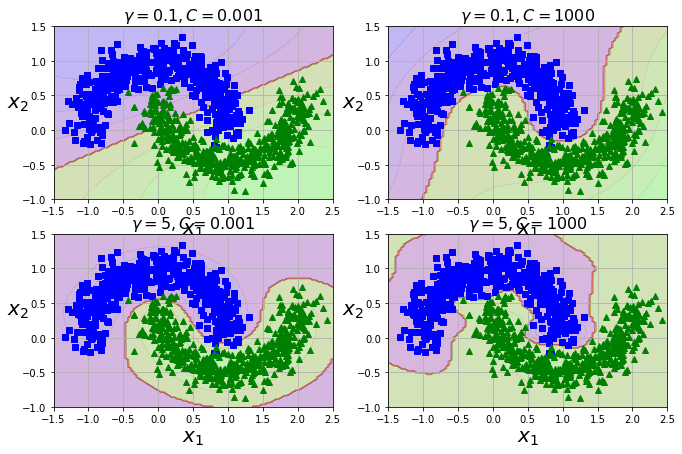

In [88]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X_moon, y_moon)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X_moon, y_moon, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

In [25]:
gamma1, gamma2 = 0.1, 2
C1, C2 = 0.01, 5
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma = gamma, C = C)
    train_size, train_scores, test_scores = learning_curve(rbf_kernel_svm_clf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=5,
                                                       n_jobs=-1)
    print('fatto {},{}'.format(gamma,C))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 0.1,0.01
fatto 0.1,5
fatto 2,0.01
fatto 2,5


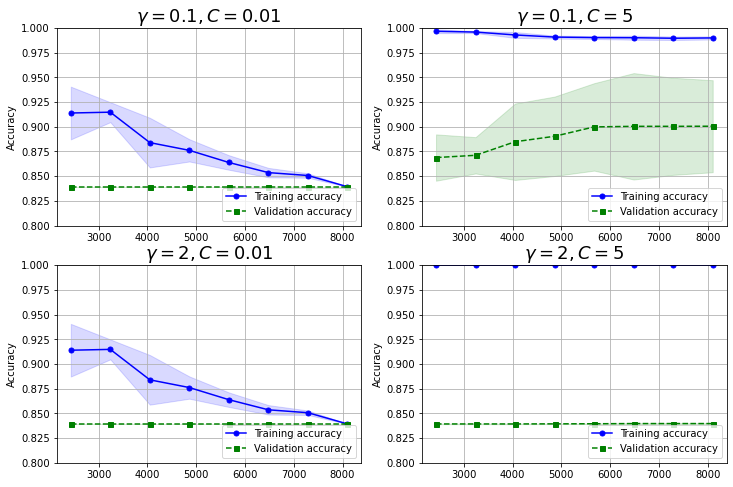

In [33]:
fig= plt.figure(figsize=(12, 8))
for i in range(4):
    ax = fig.add_subplot(221+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

### Computational Complexity
**LinearSVC** utilizza la libreria liblinear che implementa un algoritmo ottimizzato per SVM lineari. La complessita' del training e' $O(mn)$ dove $m$ e' il numero di feature e $n$ il numero di istanze.

**SVC** utilizza la libreria libsvm e i tempi di computazione variano $O(m^2n)$ a $O(m^3n)$, rendendo SVM un classificatore per dataset complessi ma di dimensione piccola e media (max 100K istanze)

# Decision Tree
I decision tree sono un secondo strumento piuttosto versatile per problemi di classificazione e regressione. Inoltre sono una componente fondamentale per Random Forest. 
Decision Trees can perform both classification and regression. They are a fundamental components of Random Forests. Moreover they do not require feaure scaling.

Negli esempi utilizzeremo il dataset Iris per evidenziare le peculiarita' dell'approccio e il dataset delle carte di credito per testare le performance su un caso d'uso.

In [89]:
iris_data = load_iris()
X_iris = iris_data['data'][:,2:]
y_iris = iris_data["target"]

In SKL, i decision tree per la classificazione sono implementati dalla classe **DecisionTreeClassifier**. 

In [90]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

La struttura del decision tree addestrato e' visualizzabile mediante il metodo **export_graphviz()**, il quale crea un file .dot. E' possibile convertire il file .dot in immagine o pdf mediante l'utility Graphviz (https://graphviz.org/download/) e da prompt dei comandi digitare
```
dot -Tpng <file>.dot -o <file>.png


In [40]:
export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris_data.feature_names[2:],
        class_names=iris_data.target_names,
        rounded=True,
        filled=True
    )

![](iris_tree.png)

### Making predictions
Uno dei vantaggi di DT e' la leggiblita' del modello (White Box) che indica come il classificatore esegue una predizione. Partendo dalla radice dell'albero, ci chiediamo se la lunghezza del petalo e' minore di 2.45. In caso positivo, ci spostiamo nel figlio sinistro, ed essendo una foglia restituiamo la classe del nodo. Nel caso di petalo con lunghezza maggiore di 2.45, dobbiamo verificare una secondo condizione sulla larghezza del petalo e in base alla misura prediciamo una classe rispetto all'altra.

L'attributo **samples** indica a quante istanze del training set si applica la condizione. La somma dei valori samples dei figli deve coincidere con il valore samples del padre. 

L'attributo **value** indica a quante istanze di una classe, si applica la condizione del nodo. La somma deve corrispondere al valore samples del nodo.

L'attributo **gini**  indica il valore di Gini impurity per quel nodo. Se $G = 0$, il nodo e' puro, quindi il nodo si applica ad una sola classe. 

**Gini impurity**
$$G_i = 1 - \sum_{k=1}^n p_{i,k}^2$$
dove $p_{i,k}$ e' il rapporto tra il numero di istanze della classe $k$ in quel nodo e il valore di sample del nodo $i$. Il valore minimo di $G$ e' 0 e si ottiene quando una classe $k$ ha $p_k = 1$. Mentre il valore massimo e' dato da una distribuzione delle classi uniforme, $G = 1 - \sum_{k=1}^n p_{i,k}^2 = 1 - \sum_{k=1}^n (1/n)^2 = 1 - \frac{n}{n^2} = 1 - \frac{1}{n}$

Possiamo anche definire le aree di decisione identificate

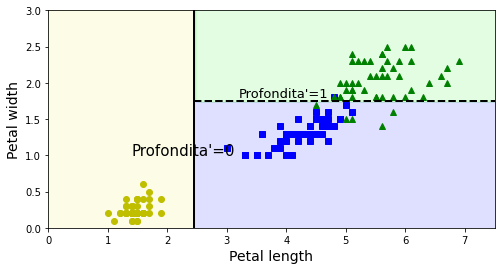

In [91]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X_iris, y_iris)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Profondita'=0", fontsize=15)
plt.text(3.2, 1.80, "Profondita'=1", fontsize=13)

plt.show()

### Estimating class probabilities
Un DT stima anche la probabilita' che un'istanza appartenga alla classe $k$. Attraversa l'albero fino a giungere ad una foglia e restituisce la percentuale di elementi con classe $k$ presenti nel nodo. 

Per esempio:

In [46]:
print(tree_clf.predict_proba([[5, 1.5]]))
tree_clf.predict([[5, 1.5]])[0]

[[0.         0.90740741 0.09259259]]


1

In [47]:
49/54, 5/54

(0.9074074074074074, 0.09259259259259259)

## The CART training algorithm
SKL utilizza l'algoritmo Classification And Regression Tree (CART) per la fase di training. L'algoritmo prinva divide il training set in due sottoinsiemi basandosi sulla feature $k$ e una soglia $t_k$, individuando la coppia $(k, t_k)$ corrispondente al partizionamento piu' puro. La funzione costo che tenta di minimizzare e'
$$J(k,t_k) = \frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$$
dove $G_{\{.\}}$ misura l'impurita' dei sottoinsiemi di sinistra e destra and $m_{\{.\}}$ e' il numero di istanze a sinistra e destra.

Lo stesso meccanismo di ricerca della partizione migliore viene applicato ai sottoinsiemi trovati e la procedura prosegue in modo ricorsivo. 

Il partizionamento si ferma alla profondita' specificata da **max_depth**  o se non si trova una divisione che non riduce l'impurita'

**NB:** CART algorithm e' un algortimo greedy - non esegue backtracking. Non garantisce l'ottimalita' delle partizioni.


### Entropy or impurity
Di default, viene utilizzata la misura di Gini impurity, tuttavia e' possibile utilizzare l'entropia come misuar di impuriat'selezionando il parametro  **criterion** a "entropy". L'entropia di una partizione e' 0 quando contiene istanze di una sola classe.
$$H_{i} = - \sum_{k=1}^{n}p_{i,k}log(p_{i,k})$$

### Regularization Hyperparameters
DT utilizza poche assunzioni sui dati di training. Senza vincoli si adatta al training set e molto probabilmente presentera' il problema dell'overfitting. Per evitare overfitting si possono limitare i gradi di liberta' di un DT agendo sugli iperparametri. I parametri di regolarizzazione dipendono dall'algoritmo utilizzato per il training, tuttavia e' comune agire sulla profondita' massima dell'albero. In SKL la profondita' e' controllata da **max_depth**. Riducendo max_depth riduco la varianza aumentando il bias e riduco il rischio di overfitting.


**DecisionTreeClassifier** ha altri parametri che agiscono sulla forma dell'albero da apprendere: 
- **min_samples_split**: numero minimo istanze affinche' il nodo venga splittato
- **min_samples_leaf**: numero minimo di istanze in un nodo foglia,
- **min_weight_fraction_leaf**: stessa semantica del parametro precedente ma valutata sulla percentuale rispetto al numero totale di istanze nel training
- **max_leaf_nodes**: numero massimo di nodi foglia
- **max_features**: numero massimo di feature da valutare nel partizionamento del nodo

Aumentare i parametri min_ o ridurre i max_ regolarizza il modello.

Vediamo un esempio

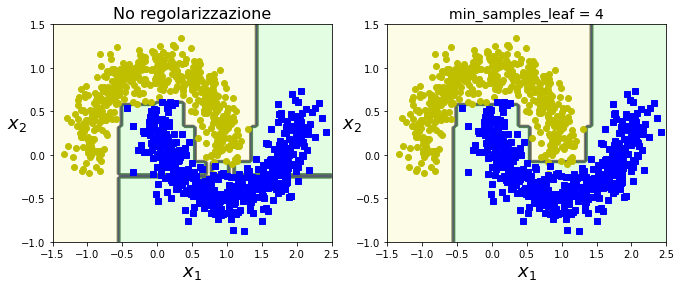

In [93]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(X_moon, y_moon)
deep_tree_clf2.fit(X_moon, y_moon)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, X_moon, y_moon, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No regolarizzazione", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, X_moon, y_moon, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

### Instability
A causa dell'alta varianza i DT sono sensibili a piccole variazioni del training set

Rimuovendo il valore piu' elevato di Iris-Versicolor (lunghezza petalo 4.8 cm e larghezza 1.8 cm wide) si ottiene un DT diverso

In [50]:
X_iris[(X_iris[:, 1]==X_iris[:, 1][y_iris==1].max()) & (y_iris==1)]

array([[4.8, 1.8]])

In [51]:
not_widest_versicolor = (X_iris[:, 1]!=1.8) | (y_iris==2)
X_tweaked = X_iris[not_widest_versicolor]
y_tweaked = y_iris[not_widest_versicolor]
print(X_tweaked.shape)
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

(149, 2)


DecisionTreeClassifier(max_depth=2, random_state=40)

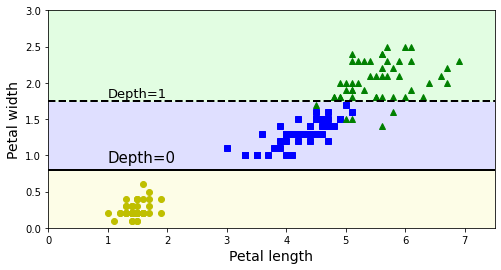

In [52]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

In [58]:
min_leaf = [5, 10, 100, 200, 350]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_mlf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    train_size, train_scores, test_scores = learning_curve(dt_mlf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=10,
                                                       n_jobs=-1)
    print('fatto {}'.format(mlf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto 5
fatto 10
fatto 100
fatto 200
fatto 350


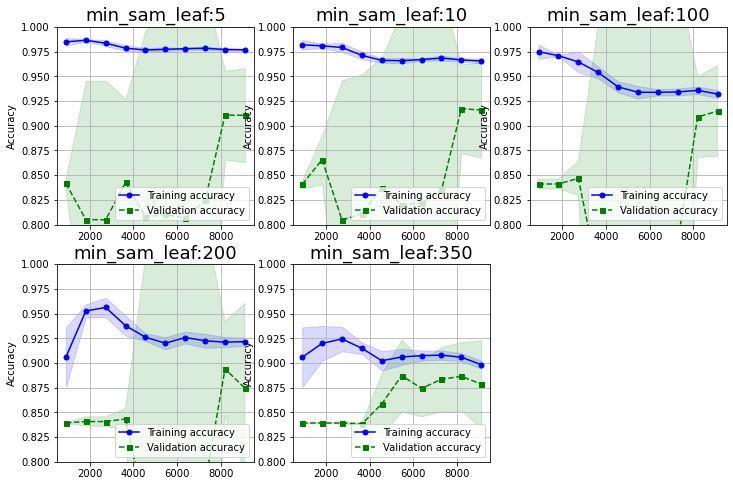

In [59]:
fig= plt.figure(figsize=(12, 8))
for i in range(5):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

In [60]:
tree_card_clf = DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, random_state=42)
tree_card_clf.fit(X, y)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, random_state=42)

In [63]:
export_graphviz(
        tree_card_clf,
        out_file="card_tree.dot",
        feature_names=columns_name,
        class_names=['Not Churn','Churn'],
        rounded=True,
        filled=True
    )

# Ensemble Learning and Random Forest

Spesso se si aggregano e/o combinano le predizioni di un gruppo di classificatori si ottiene un classificatore migliore dei singoli classificatori. Un gruppo di classificatori e' detto **ensemble**.

## Voting classifier
un modo per aggrgeare le predizioni di $n$ classificatori e' restituire la classe piu' votata dei classificatori. Ogni classificatore esegue una predizione e viene restituia la classe di maggioranza: **hard voting**.

![](voting_clf.png)

Anche se ogni singolo classificatore e' leggermente migliore di un random guesser (baseline), l'aggregazione determina un classificatore con performance migliori posto che i classificatori deboli siano numerosi e di diverso tipo. Il secondo punto - diversita' di modelli - aumenta l'indipendenza tra i classificatori.

In SKL la classe **VotingClassifier** del modulo **ensemble** implementa la strategia di hard voting.

In [58]:
def visualize_ensemble_performance(ax, X, y, scores, scoring):
    data_score = []
    labels = []
    for clf in scores['estimator'][0].estimators_:
        scores_clf = cross_validate(clf, X, y,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
                        return_train_score= True,
                        scoring = scoring,
                        n_jobs=-1)
        data_score.extend([scores_clf[t+s] for s in scoring for t in ['train_','test_']])
        labels.extend([clf.__class__.__name__+'_'+t+s for s in scoring for t in ['train_','test_']])
    data_score.extend([scores[t+s] for s in scoring for t in ['train_','test_']])
    labels.extend(['Voting_'+t+s for s in scoring for t in ['train_','test_']])
    sns.boxplot(ax = ax,
                data = data_score,
                whis = [5, 95],
                palette = "vlag",
                orient = 'h'
               )
    ax.set(yticklabels=labels)

Applichiamo una strategia di hard voting al dataset delle due lune

In [60]:
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)
per_clf = Perceptron(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('pc', per_clf), ('svc', svm_clf)],
    voting='hard')

In [61]:
scores = cross_validate(voting_clf, X_moon, y_moon,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
                        return_estimator = True,
                        return_train_score= True,
                        scoring = ['recall','accuracy','f1'],
                        n_jobs=-1)

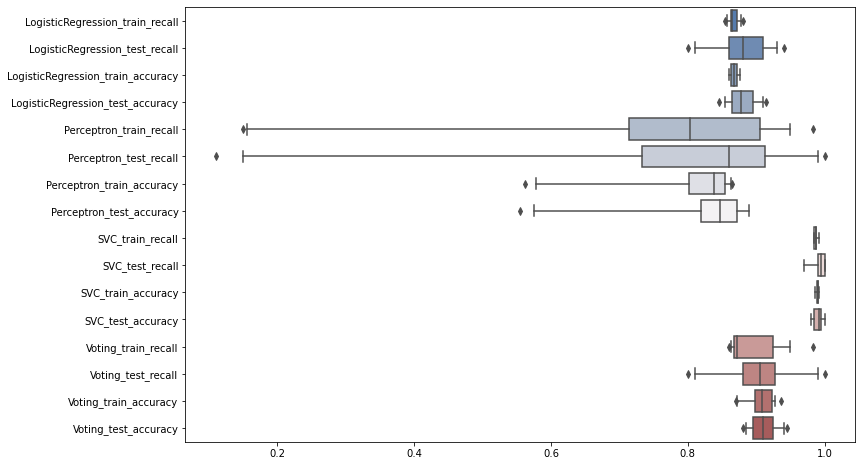

In [62]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, X_moon, y_moon, scores, ['recall','accuracy'])

Applichiamo la stessa strategia di voting al dataset delle carte di credito

In [63]:
scores = cross_validate(voting_clf, X, y,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42),
                        return_estimator = True,
                        return_train_score= True,
                        scoring = ['recall','accuracy','f1'],
                        n_jobs=-1)

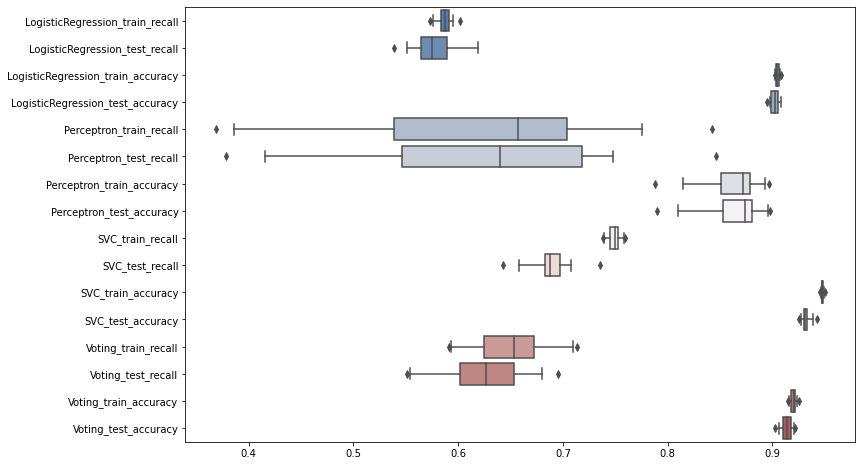

In [65]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, X, y, scores, ['recall','accuracy'])

Se tutti i classificatori stimano la probabilita' che un'istanza appartenga ad una classe - implementano il metodo **predict_proba**, allora si puo' applicare una strategia di _soft voting_. Viene predetta la classe con lo score medio piu' elevato, dove la media si valuta sugli score restituiti dai singoli classificatori per una determinata classe. In generale, la strategia di soft voting restituisce risultati migliori rispetto ad hard voting.

### Bagging and pasting
Un secondo approccio di ensemble e' utilizzare lo stesso modello di apprendimento ma addestrato su diversi partizionamenti del training set. Se utilizzo un campionamento con reimmissione, il metodo e' detto **bagging** o **bootstrap aggregating**, mentre in caso di non reimmisione, il metodo e' detto **pasting**.

![](bagging.png)

Per effettuare una predizione si aggregano le predizioni dei classificatori usando la _moda_ (classificazione) oppure la media (regressione). In generale, il predittore ensemble ha una varianza minore rispetto al singolo predittore addestrato su tutto il dataset.

In SKL bagging e pasting sono implementati dalla classe **BaggingClassifier** del modulo **ensemble**. Il passaggio da un metodo all'altro e' gestito dal parametro **boostrap**.  

In [66]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=200, bootstrap=True, n_jobs=-1)
dt_clf = DecisionTreeClassifier()

In [68]:
train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for clf in [bag_clf, dt_clf]:
    train_size, train_scores, test_scores = learning_curve(clf,
                                                       X=X_moon,
                                                       y=y_moon,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
                                                       n_jobs=-1)
    print('fatto {}'.format(clf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=200,
                  n_estimators=500, n_jobs=-1)
fatto DecisionTreeClassifier()


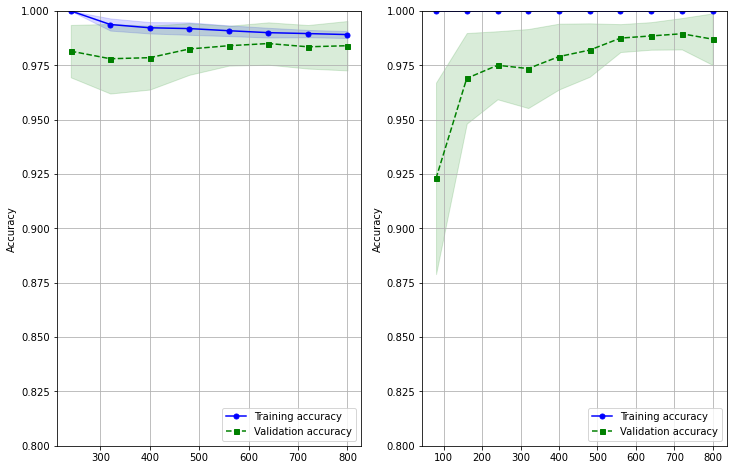

In [70]:
fig= plt.figure(figsize=(12, 8))
for i in range(2):
    ax = fig.add_subplot(121+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

In [71]:
train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for clf in [bag_clf, dt_clf]:
    train_size, train_scores, test_scores = learning_curve(clf,
                                                       X=X,
                                                       y=y,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
                                                       n_jobs=-1)
    print('fatto {}'.format(clf))
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

fatto BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=200,
                  n_estimators=500, n_jobs=-1)
fatto DecisionTreeClassifier()


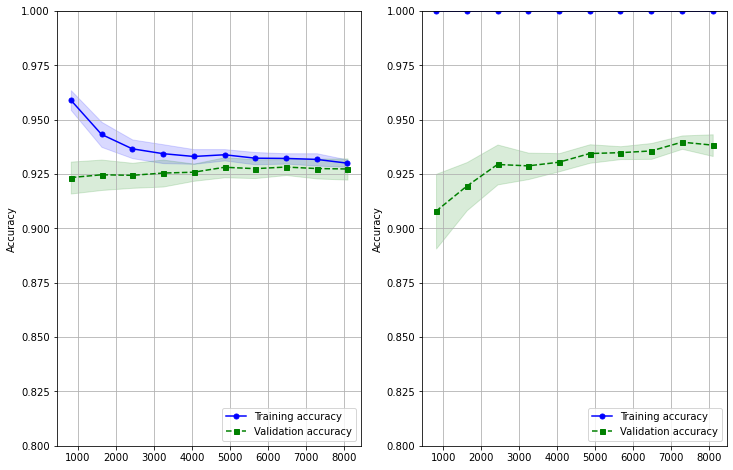

In [72]:
fig= plt.figure(figsize=(12, 8))
for i in range(2):
    ax = fig.add_subplot(121+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')

BaggingClassifier supporta il campionamento delle feature anziche' delle istanze, mediante i parametri **max_features** e **bootstrap_features**. In questo modo ogni classificatore utilizza un sottoinsieme di feature. Se campiono sia feature sia istanze applico un metodo **Random Patches**, mentre se campiono solo le feature applico un metodo di **Random Subspaces**.

## Random Forest

RF e' un ensemble di Decision Trees utilizzando un metodo di bagging con *max_samples* posto uguale alla numerosita' del training set. In SKL e' implementato dalla classe **RandomForestClassifier** ottimizata per i DT rispetto all'applicazione della classe BaggingClassifier. Coniugando l'approccio bagging e DT, gli iperparametri dell'algoritmo sono l'unione degli iperparametri degli elementi costitutivi. Inoltre, nella crescita dell'albero non vengono considerate tutte le feature per cercare lo splitting migliore ma un sottoinsieme casuale. In questo modo aumento la diversita' degli alberi.

Inoltre, riguardando la formulazione dell'algoritmo CART, il partizionamento e' basato anche il parametro di soglia $t_k$, il quale puo' essere invece inizializzato in maniera casuale per ogni feature. Una foresta di questo tipo e' detta **Extremely Randomized Trees** or **Extra-tree**. Il vanataggio di tale approccio sono le migliori prestazioni computazionali nella fase di training. In SKL la classe **ExtraTreeClassifier** implementa l'algoritmo extra-tree.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [84]:
len(y_train[y_train == 1])/len(y_train), len(y_test[y_test == 1])/len(y_test)

(0.16074074074074074, 0.16049382716049382)

In [92]:
rnf_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
et_clf = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=64, n_jobs=-1, max_features=10)
scores_rnf = cross_val_score(rnf_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
scores_et = cross_val_score(et_clf, X_train, y_train, cv=5, scoring='f1',n_jobs=-1)

[[Text(0, 0, 'RF'), Text(0, 1, 'ET')]]

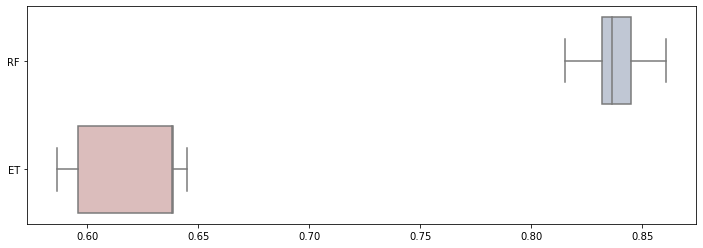

In [93]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sns.boxplot(ax = ax,
            data = [scores_rnf, scores_et],
            palette = 'vlag',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET'])

In un singolo DT le feature piu' importanti, i.e. discriminanti, molto probabilmente sono posizionate nei nodi prossimi alla radice, mentre quelle meno importanti nei nodi vicino alle foglie. E' possibile avere una stima dell'importanza di una feature calcolando la profondita' media in cui una feature appare negli alberi facenti parte della foresta.

In SKL l'importanza delle feature e' disponibile accedendo all'attributo **feature_importances_**. 

In [94]:
rnf_clf.fit(X,y)

RandomForestClassifier(max_features=10, max_leaf_nodes=64, n_estimators=250,
                       n_jobs=-1)

In [98]:
named_feat_importance = dict(zip(columns_name, rnf_clf.feature_importances_))

In [101]:
sorted(named_feat_importance.items(), key=lambda x:x[1], reverse=True)[:10]

[('Total_Trans_Ct', 0.22338001021860487),
 ('Total_Trans_Amt', 0.2083320858064862),
 ('Total_Revolving_Bal', 0.14300236030639973),
 ('Total_Ct_Chng_Q4_Q1', 0.1120841534716637),
 ('Total_Relationship_Count', 0.08969746644916633),
 ('Avg_Utilization_Ratio', 0.06740318145327712),
 ('Total_Amt_Chng_Q4_Q1', 0.04828608994096042),
 ('Customer_Age', 0.022245082859517252),
 ('Contacts_Count_12_mon', 0.01687005745312897),
 ('Months_Inactive_12_mon', 0.016699984266187313)]

In questo modo ottengo in modo rapido una prima evidenza sull'importanza delle feature ed eventualmente sulla possibilita' di eseguire una feature selection.

## Boosting

Sono metodi di ensemble in cui i classificatori sono addestrati in modo sequenziale, ed ogni classificatori corregge il classificatore precedente. I metodi piu' importanti sono *AdaBoost* e *Gradient Boosting*.

### AdaBoost
Un modo per correggere un classificatore e' focalizzari sulle istanze che il predecessore non classifica correttamente, cioe' sulla istanze piu' difficili.

![](adaboost.png)

Per dare piu' importanza alle istanze non classificate correttamente aumento il peso di quelle istanze e addestro un classificatore con le istanze ri-pesate. Il processo viene ripetuto per il numero di classificatori nel pool.

In AdaBoost il peso associato ad ogni istanza e' $w_i=1/m$. addestrato il primo classificatore posso calcolare il tasso di errore pesato $r_j$ ($j=1$):
$$r_j = \frac{\sum_{i=1, \hat{y}_j(i)\neq y(i)}^m w_i}{\sum_{i=1}^m w_i}$$
dove $\hat{y}_j(i)$ indica la predizione del classificatore $j$ sull'istanza $i$.

Il peso del classificatore  $j$ viene calcolato come:
$$\alpha_j = \eta log \frac{1-r_j}{r_j}$$
dove $\eta$ e' un iperparametro e $\alpha_j$ ha la forma

![](weight_boost.png)

Infine i pesi delle istanze sono aggiornati secondo la seguente equazione:

$$
    w_i \leftarrow 
\begin{cases}
    w_i & \text{se } \hat{y}_j(i) = y(i)\\
    w_i exp(\alpha_j),              & \text{altrimenti}
\end{cases}
$$

normalizzando poi i pesi.

Dopo l'aggiornamento dei pesi il classificatore $j+1$ viene addestrato utilizzando i pesi aggiornati.

La classe predetta e' quella che riceve la maggioranza dei voti pesati:
$$\hat{y}(x) = argmax_k \sum_{j=1, \hat{y}_j=k} ^N  \alpha_j$$

In SKL il metodo AdaBoost e' implementato dalla classe **AdaBoostClassifier**

Possiamo osservare l'effetto del parametro $\eta$ in figura.

![](rate_boost.png)

In [114]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=6),
    n_estimators=100,
    algorithm='SAMME.R',
    learning_rate=0.5
)
scores_ada = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)

[[Text(0, 0, 'RF'), Text(0, 1, 'ET'), Text(0, 2, 'ADA')]]

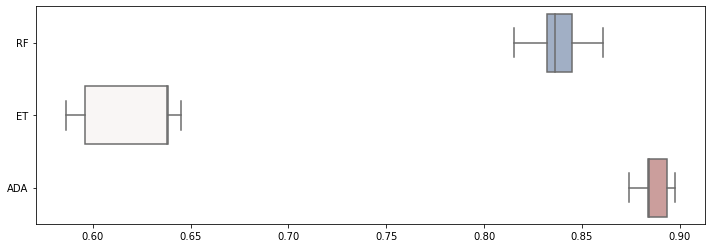

In [116]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
sns.boxplot(ax = ax,
            data = [scores_rnf, scores_et, scores_ada],
            palette = 'vlag',
            orient = 'h'
           )
ax.set(yticklabels=['RF','ET','ADA'])

### Gradient Boosting

Similmente ad AdaBoost, Gradient Boosting agisce in maniera sequenziale ma in ogni step il classificatore apprende sugli errori residui del classificatore precedente.

In [124]:
np.random.seed(42)
X_rnd = np.random.rand(100, 1) - 0.5
y_rnd = 3*X_rnd[:, 0]**2 + 0.05 * np.random.randn(100)

In [126]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_rnd, y_rnd)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [127]:
y2 = y_rnd - tree_reg1.predict(X_rnd)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_rnd, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [129]:
y3 = y2 - tree_reg2.predict(X_rnd)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_rnd, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [130]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

Text(0, 0.5, '$y$')

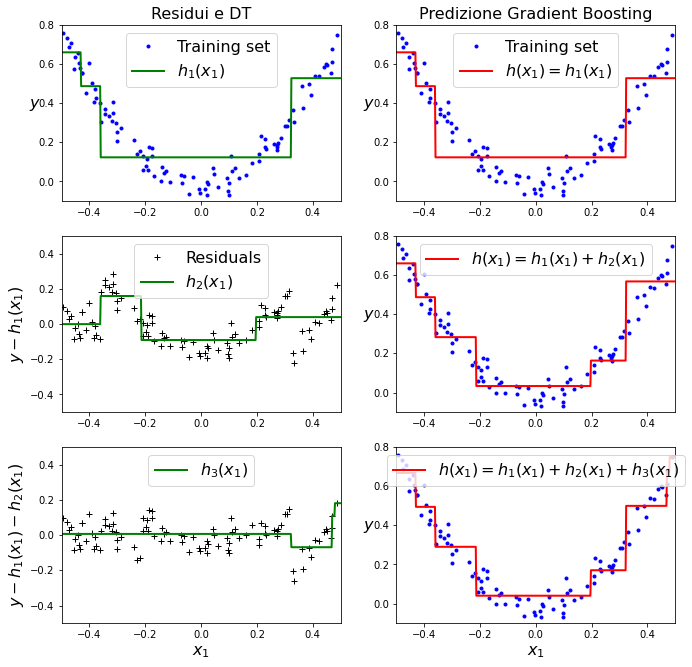

In [132]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X_rnd, y_rnd, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residui e DT", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X_rnd, y_rnd, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Predizione Gradient Boosting", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X_rnd, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X_rnd, y_rnd, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X_rnd, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X_rnd, y_rnd, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)


## Hyperparameter optimization

Gli iperparametri sono parametri non appresi direttamente dal classificatore. In SKL corrispondono ai parametri passati al costruttore della classe che implementa il classificatore. Ogni parametro puo' essere ottimizzato.

Il processo di ottimizzazione richiede:

A search object consists of:
- un oggetto Estimator;
- uno spazio dei parametri;
- un metodo di ricerca o campionamento dei candidati;
- uno schema di cross-validation scheme; e
- una funzione di score.

In SKL sono disponibili due approcci per la ricerca o il campionamento dello spazio dei parametri: 
- **GridSearchCV** che considera in modo esaustivo tutte le combinazioni di parametri
- **RandomizedSearchCV** campiona un numero dato di parametri da una distribuzione sullo spazio dei parametri.

### GridSearchCV
Grid search implementata in **GridSearchCV** genera gli insiemi di parametri da una griglia di parametri specificati dal parametro **param_grid**. GridSearchCV implementa l'interfaccia Estimator, in cui il metodo fit valuta tutte le combinazioni ammissibili e identifica la combinazione migliore.

Iniziamo ad valutare solo un insieme di classificatori

In [137]:
param_grid = [
    {'kernel': ['rbf'], 'gamma': [.1, 5, 10], 'C': [0.1, 1, 1000]},
    {'kernel': ['poly'], 'degree': [1, 2, 3], 'coef0': [1, 10, 50]}
]

svm_clf = SVC()

grid_search = GridSearchCV(estimator=svm_clf,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'f1',
                           n_jobs = -1
)

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 1000], 'gamma': [0.1, 5, 10],
                          'kernel': ['rbf']},
                         {'coef0': [1, 10, 50], 'degree': [1, 2, 3],
                          'kernel': ['poly']}],
             scoring='f1')

Il precedente codice ci impiega circa 2/3 minuit su 12 core

Mediante il metodo **best_params_** si ottiene la combinazione di parametri migliore - in questo caso secondo lo score $F1$.

In [138]:
grid_search.best_params_

{'coef0': 1, 'degree': 3, 'kernel': 'poly'}

Mediante i metodi **best_estimator_** and **best_score_** si possono ottenere il migliore classificatore e il relativo score. Di default, la classe esegue un refit su tutto il dataset - **refit=True** - utilizzando i parametri ottimali.

In [139]:
print('Best: {}'.format(grid_search.best_score_))
grid_search.best_estimator_

Best: 0.6536414342705301


SVC(coef0=1, kernel='poly')

Tutti gli score per ogni combinazione di parametri sono ottenibili mediante il metodo **cv_results**

In [140]:
results = grid_search.cv_results_

In [141]:
results = pd.DataFrame(results)[['mean_test_score','params']]
results.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,params
11,0.653641,"{'coef0': 1, 'degree': 3, 'kernel': 'poly'}"
14,0.649917,"{'coef0': 10, 'degree': 3, 'kernel': 'poly'}"
16,0.642129,"{'coef0': 50, 'degree': 2, 'kernel': 'poly'}"
13,0.640341,"{'coef0': 10, 'degree': 2, 'kernel': 'poly'}"
17,0.636770,"{'coef0': 50, 'degree': 3, 'kernel': 'poly'}"
10,0.629576,"{'coef0': 1, 'degree': 2, 'kernel': 'poly'}"
6,0.626378,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.626310,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.566772,"{'coef0': 1, 'degree': 1, 'kernel': 'poly'}"
15,0.566667,"{'coef0': 50, 'degree': 1, 'kernel': 'poly'}"


### RandomizedGridSearch

In RGS ogni insieme di parametri e' campionato da una distribuzione sullo spazio dei parametri. Il metodo di estrazione di ogni parametro e' specificato mediante un dictionary a cui si aggiunge un budget indicante quanti insiemi di parametri devo generare.

In [146]:
param_dict = {
    'kernel': ['poly'], 
    'degree': randint(2,8),
    'coef0': [1, 10, 50]
}

In [147]:
random_search = RandomizedSearchCV(estimator=svm_clf,
                                   param_distributions= param_dict,
                                   cv = 5,
                                   scoring = 'f1',
                                   n_iter=5,
                                   n_jobs = -1
                                  )

random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'coef0': [1, 10, 50],
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000199A6467CA0>,
                                        'kernel': ['poly']},
                   scoring='f1')

In [149]:
results = pd.DataFrame(random_search.cv_results_)[['mean_test_score','params']]
results.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,params
3,0.652648,"{'coef0': 1, 'degree': 4, 'kernel': 'poly'}"
1,0.642129,"{'coef0': 50, 'degree': 2, 'kernel': 'poly'}"
4,0.642129,"{'coef0': 50, 'degree': 2, 'kernel': 'poly'}"
0,0.640341,"{'coef0': 10, 'degree': 2, 'kernel': 'poly'}"
2,0.638075,"{'coef0': 1, 'degree': 5, 'kernel': 'poly'}"


GridSearchCv e RandomizedSearchCV permettono la ricerca dei parametri ottimali su estimator composti come Pipeline e ColumnTransformer.

In [160]:
credit_card_data = pd.read_csv('BankChurnersMissingData.csv')
credit_card_data.dropna(subset=['Total_Revolving_Bal','Months_Inactive_12_mon'],
                   inplace=True
                  )

# Estraggo la  colonna delle label e la rimuovo dal dataset
credit_card_label = credit_card_data['Attrition_Flag'].map(
    {'Existing Customer':0,
     'Attrited Customer':1
    }
).values
credit_card_data.drop(columns=['Attrition_Flag',
                               'CLIENTNUM',
                               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
                      inplace=True)
def unknown_imputer(X, missing_value = 'Unknown'):
    X = X.values
    unique_values, count = np.unique(X,return_counts=True)
    num_nan = count[unique_values == missing_value]
    counting = count[unique_values != missing_value]
    values = unique_values[unique_values != missing_value]
    X_new = X.copy()
    freq = counting / np.sum(counting)
    X_new[X_new == missing_value] = np.random.choice(values,size=num_nan,p=freq)
    return X_new

ui = FunctionTransformer(unknown_imputer)

customer_age_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(unknown_imputer)),
    ('ordinal', OneHotEncoder())
])

features_robust = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy']
features_standard = list(set(credit_card_data.select_dtypes(include=['int64','float64']).columns).difference(set(features_robust + ['Avg_Utilization_Ratio', 'Customer_Age'])))


data_preprocessing = ColumnTransformer([
    ('age', customer_age_pipeline, ['Customer_Age']),
    ('gender', OrdinalEncoder(categories=[['M','F']]), ['Gender']),
    ('edu', category_pipeline, ['Education_Level']),
    ('status', category_pipeline, ['Marital_Status']),
    ('income', category_pipeline, ['Income_Category']),
    ('card', category_pipeline, ['Card_Category']),
    ('numeric_robust', RobustScaler(), features_robust),
    ('feature_standard', StandardScaler(), features_standard)
],
    remainder = 'passthrough'
)

clf_forest_pipeline = Pipeline(steps=[
    ('preprocessing', data_preprocessing),
    ('classifier', RandomForestClassifier())
])

In [162]:
clf_forest_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifier', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__age', 'preprocessing__gender', 'preprocessing__edu', 'preprocessing__status', 'preprocessing__income', 'preprocessing__card', 'preprocessing__numeric_robust', 'preprocessing__feature_standard', 'preprocessing__age__memory', 'preprocessing__age__steps', 'preprocessing__age__verbose', 'preprocessing__age__imputer', 'preprocessing__age__scaler', 'preprocessing__age__imputer__add_indicator', 'preprocessing__age__imputer__copy', 'preprocessing__age__imputer__fill_value', 'preprocessing__age__imputer__missing_values', 'preprocessing__age__imputer__strategy', 'preprocessing__age__imputer__verbose', 'preprocessing__age__scaler__copy', 'preprocessing__age__scaler__with_mean', 'preprocessing__age__scaler__with_std', 'preprocessin

In [163]:
param_grid = [
    {'preprocessing__age__imputer__strategy': ['most_frequent','median'],
     'classifier__max_features': [8,10,'auto'],
     'classifier__max_depth':[2,5,8,None],
     'classifier__n_estimators':[10,20,50,100,150]
    }
]

In [164]:
grid_search = GridSearchCV(estimator=clf_forest_pipeline,
                           param_grid = param_grid,
                           cv = 3,
                           scoring = 'f1',
                           n_jobs = -1
)

grid_search.fit(credit_card_data, credit_card_label)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_Age']),
                                                                        ('gender',
                                                                         OrdinalEncoder(categories=[['M',
                                           

In [165]:
grid_search.best_score_

0.6426878376515913

Posso valutare anche diverse metriche nella stessa valutazione.

In [167]:
grid_search = GridSearchCV(clf_forest_pipeline, 
                           param_grid= param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring=['f1','accuracy'],
                           refit = 'f1'
                          )

In [168]:
grid_search.fit(credit_card_data, credit_card_label)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Customer_Age']),
                                                                        ('gender',
                                                                         OrdinalEncoder(categories=[['M',
                                           

In [175]:
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_f1','params','mean_test_accuracy']]
results.sort_values(by='mean_test_f1',ascending=False)

,mean_test_f1,params,mean_test_accuracy
104,0.687672,"{'classifier__max_depth': None, 'classifier__m...",0.924444
98,0.687168,"{'classifier__max_depth': None, 'classifier__m...",0.924840
97,0.685847,"{'classifier__max_depth': None, 'classifier__m...",0.924148
108,0.682297,"{'classifier__max_depth': None, 'classifier__m...",0.923556
118,0.682270,"{'classifier__max_depth': None, 'classifier__m...",0.923358
...,...,...,...
22,0.098977,"{'classifier__max_depth': 2, 'classifier__max_...",0.846617
26,0.075646,"{'classifier__max_depth': 2, 'classifier__max_...",0.845136
27,0.072970,"{'classifier__max_depth': 2, 'classifier__max_...",0.844840
29,0.062694,"{'classifier__max_depth': 2, 'classifier__max_...",0.844543


In [176]:
grid_search.best_params_

{'classifier__max_depth': None,
 'classifier__max_features': 10,
 'classifier__n_estimators': 50,
 'preprocessing__age__imputer__strategy': 'most_frequent'}

## Imbalanced class
Una strategia per gestire lo sbilanciamento delle classi e' il campionamento o resampling

In [177]:
X_fake, y_fake = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=10
)

df_fake = pd.DataFrame(X_fake)
df_fake['target'] = y_fake

<AxesSubplot:title={'center':'Count (target)'}>

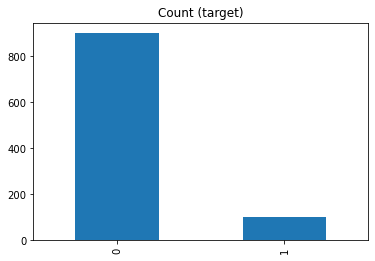

In [178]:
df_fake.target.value_counts().plot(kind='bar', title='Count (target)')

Per trattare le classi sbilanciate dobbiamo installare il package imbalanced-learn: 
```
pip install -U imbalanced-learn
```
Le tecniche di resampling sono divise in:
- upsampling della classe di minoranza
- downsampling della classe di maggioranza
- generazione di istanze sintetiche

### Upsampling
Possiamo fare upsampling della classi minoritaria mediante la classe **RandomOverSampler**

In [179]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_fake, y_fake)

In [180]:
np.unique(y_ros, return_counts=True)[1]

array([900, 900], dtype=int64)

### Downsampling
Per sottocampionare - downsampling - la classe maggioritaria possiamo  utilizzare:
- **RandomUnderSampler**
- **TomenLinks** per un downsampling targettizzato

In [181]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_fake, y_fake)
np.unique(y_rus, return_counts=True)[1]

array([100, 100], dtype=int64)

I Tomek links sonon coppie di istanze molto vicine ma di classi opposte. Rimuovendo le istanze della classe maggioritaria si accresce lo spazio tra le classi
![](tomek.png)

In [183]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X_fake, y_fake)

### Sample generation
SMOTE (Synthetic Minority Oversampling TEchnique) genera elementi sintetici della classe minoritaria, basandosi su qulli che esistono gia'. Scegliendo in modo casuale un punto della classe minoritaria, ricerca i k punti della stessa classe piu' vicini - k-nearest neighbors - e genera un punto tra gli estremi identificati. 
![](smote.png)

In [185]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

Il precedente processo puo' essere inserito in una pipeline

In [186]:
from imblearn.pipeline import make_pipeline as mp

In [187]:
pipe = mp(
    SMOTE(),
    SVC()
)

param_grid = {
    'smote__sampling_strategy' : [0.3, 0.5, 0.7, 'minority'],
    'svc__kernel' : ['rbf'],
    'svc__gamma' : [0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=pipe,
                          param_grid= param_grid,
                          cv = 5,
                          n_jobs=-1,
                          scoring = 'roc_auc')
grid_search.fit(X_fake,y_fake)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'smote__sampling_strategy': [0.3, 0.5, 0.7,
                                                      'minority'],
                         'svc__gamma': [0.1, 1, 10], 'svc__kernel': ['rbf']},
             scoring='roc_auc')

In [188]:
grid_search.best_params_

{'smote__sampling_strategy': 0.3, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Nel caso non si volesse ricampionare i dati, si possono incorporare i pesi delle classi nella funzione di costo, assegnando alla classe di minoranza un peso maggiore 

Scikit-learn SKL fornisce una funzione per calcolare i pesi in base alla distribuzione delle classi
```python
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y), y)
```

In [324]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(y_fake), y_fake)

In [325]:
weights

array([0.55555556, 5.        ])

In [327]:
rf_w = RandomForestClassifier(class_weight={i:e for i, e in enumerate(weights)})
rf_w.fit(X_fake,y_fake)

RandomForestClassifier(bootstrap=True,
            class_weight={0: 0.5555555555555556, 1: 5.0}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)